In [93]:
#import lib
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, acos

In [82]:
# use pandas to read data 
filepath='A:\After_collage\Zep_task\ZepDataSet.xlsx'
data=pd.read_excel(filepath,parse_dates=['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'])

# **See the content of the data**

In [83]:
data.head()

,tripuid,origin_location,destination_location,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
0,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","STERLING HEIGHTS, MI",42.537908,-83.037650,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-05-03 12:21:00
1,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","WARREN, MI",42.499210,-83.037413,2021-04-30 21:45:00,2021-04-30 21:46:00,2021-04-30 19:28:00,2021-05-03 12:21:00
2,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","DETROIT STERLING, MI",42.572998,-83.040002,2021-05-01 00:00:00,2021-05-01 12:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
3,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","DETROIT NORTH YARD, MI",42.406106,-83.037049,2021-05-01 13:30:00,2021-05-01 15:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
4,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","OAKWOOD, MI",42.278053,-83.170834,2021-05-01 18:17:00,2021-05-01 18:17:00,2021-04-30 19:28:00,2021-05-03 12:21:00


In [84]:
data.tail()

,tripuid,origin_location,destination_location,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
1605,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","CLAPPER, MO",39.588213,-91.845766,2020-08-13 04:24:00,2020-08-13 04:24:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1606,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","MOBERLY, MO",39.419797,-92.436711,2020-08-13 05:23:00,2020-08-13 05:43:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1607,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","CLIFTON HILL, MO",39.438175,-92.665850,2020-08-13 07:01:00,2020-08-13 07:01:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1608,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","MISSOURI CITY, MO",39.223788,-94.321008,2020-08-13 12:25:00,2020-08-13 12:25:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1609,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","VOLTZ, MO",39.186341,-94.429775,2020-08-13 13:24:00,2020-08-13 16:30:00,2020-08-11 04:24:00,2020-08-13 13:24:00


# **Data Preprocessing**

## **get the distane between the places that the truck seen in**

In [85]:
def get_distance(slat,slon,elat,elon):
  dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
  return dist

In [89]:
truck=data['tripuid']
count=0
trip_distance=[]
truck_id=[]
for i in range(0,len(truck)):
  if i<len(truck)-1:
    if truck[i] == truck[i+1]:
      trip_distance.append(get_distance(data['sighting_location_lat'][i],data['sighting_location_lon'][i],data['sighting_location_lat'][i+1],data['sighting_location_lon'][i+1])) 
      truck_id.append(truck[i])
  else:
    break

In [90]:
print('we have total of {} distance  and total of {} truck id with repeation  '.format(len(trip_distance),len(truck_id)))

we have total of 1543 distance  and total of 1543 truck id with repeation  


# **get the distance of the Full trip**

In [91]:

total_trip_distance = [i+1 for i in range(67)]
index=0

for i in range(0,len(truck_id)):
  if i<len(truck_id)-1:
      if truck_id[i] == truck_id[i+1]:
        total_trip_distance[index]=trip_distance[i]+trip_distance[i+1]
      else:
        index+=1

In [ ]:
print('we have total of {} trip with the distance of all of them  '.format(len(total_trip_distance)))

we have total of 67 trip with the distance of all of them  


# Add the Full Trip distance to the data

In [ ]:
counter=0
FullDistance=[]
data['FullDistance']= data['tripuid'] * 0
for i in range(0,len(data['tripuid'])):
  if i<len(data['tripuid'])-1:
      if data['tripuid'][i] == data['tripuid'][i+1]:
        FullDistance.append(total_trip_distance[counter])
        
      else:
       

        counter+=1
        FullDistance.append(total_trip_distance[counter])


FullDistance.append(FullDistance[-1])
data['FullDistance']=FullDistance

# see more detail about data 

In [ ]:
data['origin_location'].unique()

array(['STEHEIGHT, MI'], dtype=object)

In [ ]:
data['destination_location'].unique()

array(['VOLTZ, MO'], dtype=object)

In [ ]:
data.drop(['destination_location','origin_location'],inplace=True,axis=1)
# drop this two colunms 

#### see if there a duplications in data 

In [ ]:
data.duplicated().sum()

2

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1608, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1609
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripuid                  1608 non-null   object        
 1   sighting_location        1608 non-null   object        
 2   sighting_location_lat    1608 non-null   float64       
 3   sighting_location_lon    1608 non-null   float64       
 4   location_arrival_date    1608 non-null   datetime64[ns]
 5   location_departure_date  1608 non-null   datetime64[ns]
 6   origin_departure_date    1608 non-null   datetime64[ns]
 7   train_arrival_date       1608 non-null   datetime64[ns]
 8   FullDistance             1608 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(2)
memory usage: 125.6+ KB


#### as we can see the data has no nulls and the data is datatime64 type 

# get the full trip time

In [ ]:
def getDeltaOfTiem(feature_from,feature_to):
  # create a column with timedelta as total hours, as a float type
  data['tot_hour_diff'] = (data[feature_from] - data[feature_to]) / pd.Timedelta(hours=1)

getDeltaOfTiem('train_arrival_date','origin_departure_date')

In [ ]:
data['tot_hour_diff'].unique()

array([ 64.88333333, 102.28333333,  73.98333333,  92.2       ,
        66.06666667,  74.5       ,  64.73333333,  83.91666667,
        62.6       ,  82.71666667,  60.63333333, 133.76666667,
       112.25      ,  78.98333333,  80.46666667,  64.2       ,
        73.93333333,  76.33333333,  94.61666667,  90.28333333,
        91.51666667, 107.61666667,  76.76666667,  84.13333333,
        78.        ,  66.71666667,  79.98333333,  71.18333333,
        62.01666667,  56.41666667,  84.25      , 111.13333333,
       113.9       ,  92.8       , 270.56666667,  90.35      ,
        51.88333333,  87.93333333,  76.25      ,  58.6       ,
        53.61666667,  84.31666667,  68.58333333, 106.48333333,
        68.8       ,  78.71666667,  78.55      , 101.01666667,
       103.06666667,  77.55      ,  76.03333333,  68.96666667,
        72.41666667, 103.05      , 119.8       ,  66.8       ,
        52.86666667, 100.73333333,  83.21666667,  83.73333333,
        79.4       ,  72.75      ,  64.35      ,  66.9 

In [ ]:
data.describe()

,sighting_location_lat,sighting_location_lon,FullDistance,tot_hour_diff
count,1608.000000,1608.000000,1608.000000,1608.000000
mean,40.833995,-87.005605,1320.429988,84.812697
std,1.155348,3.624933,456.999441,36.014323
min,38.631000,-94.461348,249.040385,51.883333
25%,39.847396,-88.944443,1329.469874,66.800000
50%,40.758986,-86.067327,1329.469874,76.333333
75%,42.278053,-83.170834,1329.469874,90.350000
max,42.572998,-83.037049,5467.790510,270.566667


# recreate time and date and change there Datatype

In [ ]:
def recreateTimeAndDateFeatures(Feature):
  data['Y_'+Feature] = [d.year for d in data[Feature]]
  data['month_'+Feature] = [d.month for d in data[Feature]]
  data['D_'+Feature] = [d.day for d in data[Feature]]
  data['H_'+Feature] = [d.hour for d in data[Feature]]
  data['M_'+Feature] = [d.minute for d in data[Feature]]



recreateTimeAndDateFeatures('location_arrival_date')
recreateTimeAndDateFeatures('location_departure_date')
recreateTimeAndDateFeatures('origin_departure_date')
recreateTimeAndDateFeatures('train_arrival_date')

data.drop(['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'],inplace=True,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1609
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tripuid                        1608 non-null   object 
 1   sighting_location              1608 non-null   object 
 2   sighting_location_lat          1608 non-null   float64
 3   sighting_location_lon          1608 non-null   float64
 4   FullDistance                   1608 non-null   float64
 5   tot_hour_diff                  1608 non-null   float64
 6   Y_location_arrival_date        1608 non-null   int64  
 7   month_location_arrival_date    1608 non-null   int64  
 8   D_location_arrival_date        1608 non-null   int64  
 9   H_location_arrival_date        1608 non-null   int64  
 10  M_location_arrival_date        1608 non-null   int64  
 11  Y_location_departure_date      1608 non-null   int64  
 12  month_location_departure_date  1608 non-null   i

<h1> Visualization⌛

In [ ]:
import seaborn as sns

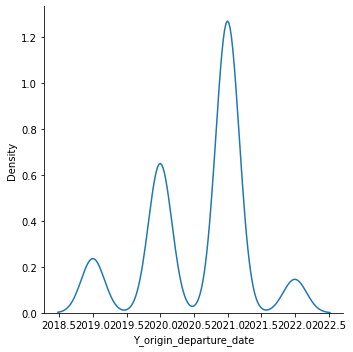

In [ ]:
sns.displot(data=data, x="Y_origin_departure_date", kind="kde")

## year 2021 was the year with the most trips

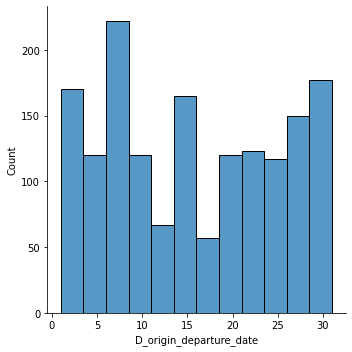

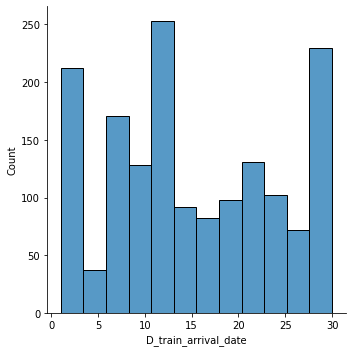

In [ ]:
sns.displot(data=data, x="D_origin_departure_date")
sns.displot(data=data, x="D_train_arrival_date")

# the busy days at the mouth are the start and the end of the mouth 

<AxesSubplot:xlabel='H_train_arrival_date', ylabel='D_train_arrival_date'>

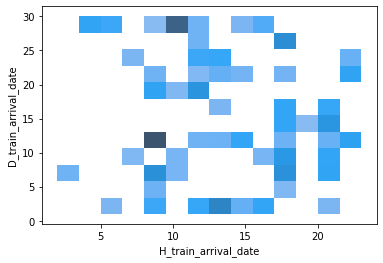

In [ ]:
sns.histplot(data=data,x='H_train_arrival_date',y='D_train_arrival_date')

#### the days in the middel of the month (15) is almost empty on the other hand the days on the start of the month (1:12) and the end (20:30) is very busy  

<AxesSubplot:xlabel='tot_hour_diff'>

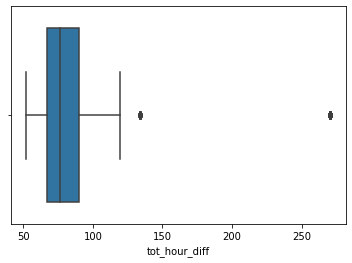

In [ ]:
sns.boxplot(x=data['tot_hour_diff'])

the mean time that each trip tack is  84.81269693200663


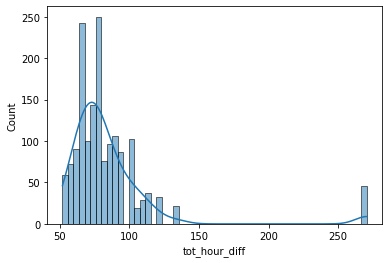

In [ ]:
sns.histplot(x=data['tot_hour_diff'],kde=True)
print('the mean time that each trip tack is ',data['tot_hour_diff'].mean())

<h1> the mean of the trip time is 84.81 hour and the range of all trips is 50 to 105 

the mean time that each trip tack is  1320.4299879889609


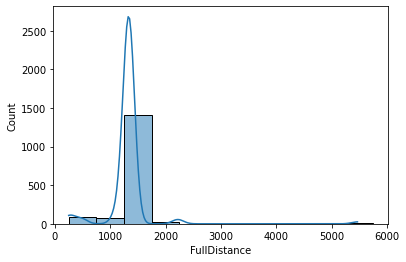

In [ ]:
sns.histplot(data=data,x='FullDistance' ,binwidth=500,kde=True)

print('the mean time that each trip tack is ',data['FullDistance'].mean())

#### all most all trips cut from 1000 km to 2000 km

### the distrubuion of the time col similar the distrubuion of the distance col

# One-Hot Encoder Get-Dummies

In [ ]:

new_data=pd.get_dummies(data=data,columns=['sighting_location'],drop_first=True)

new_data.drop(['tripuid'],inplace=True,axis=1)

### marge the time of the arrive from hours and minutes to only minutes

In [ ]:
target_model_hour=new_data['H_train_arrival_date']
target_model_minute=new_data['M_train_arrival_date']


In [ ]:
total_train_arrival_date=(target_model_hour*60)+target_model_minute
# total_train_arrival_date

In [ ]:
new_data.drop(['M_train_arrival_date','H_train_arrival_date'],inplace=True,axis=1)
new_data['time_train_arrival_date']=total_train_arrival_date

In [ ]:
new_data.head()

,sighting_location_lat,sighting_location_lon,FullDistance,tot_hour_diff,Y_location_arrival_date,month_location_arrival_date,D_location_arrival_date,H_location_arrival_date,M_location_arrival_date,Y_location_departure_date,...,"sighting_location_ROUGE RIVER SCANNER, MI","sighting_location_SAND CREEK, MI","sighting_location_STATE LINE CITY, IN","sighting_location_STERLING HEIGHTS, MI","sighting_location_TAYLOR, MI","sighting_location_THURMAN, IN","sighting_location_VOLTZ MIX CTR, MO","sighting_location_VOLTZ, MO","sighting_location_WARREN, MI",time_train_arrival_date
0,42.537908,-83.037650,1329.469874,64.883333,2021,4,30,19,28,2021,...,0,0,0,1,0,0,0,0,0,741
1,42.499210,-83.037413,1329.469874,64.883333,2021,4,30,21,45,2021,...,0,0,0,0,0,0,0,0,1,741
2,42.572998,-83.040002,1329.469874,64.883333,2021,5,1,0,0,2021,...,0,0,0,0,0,0,0,0,0,741
3,42.406106,-83.037049,1329.469874,64.883333,2021,5,1,13,30,2021,...,0,0,0,0,0,0,0,0,0,741
4,42.278053,-83.170834,1329.469874,64.883333,2021,5,1,18,17,2021,...,0,0,0,0,0,0,0,0,0,741


In [ ]:
data['sighting_location'].unique()

array(['STERLING HEIGHTS, MI', 'WARREN, MI', 'DETROIT STERLING, MI',
       'DETROIT NORTH YARD, MI', 'OAKWOOD, MI', 'ROUGE RIVER SCANNER, MI',
       'TAYLOR, MI', 'SAND CREEK, MI', 'MONTPELIER, OH', 'THURMAN, IN',
       'FORT WAYNE, IN', 'FT WAYNE TBT, IN', 'ROANOKE SCANNER, IN',
       'ROANOKE, IN', 'RICHVALLEY, IN', 'PERU, IN', 'NEW WAVERLY, IN',
       'LAFAYETTE, IN', 'FLINT SCANNER, IN', 'MARSHFIELD, IN',
       'NEWELL, IL', 'HOMER, IL', 'MILMINE, IL', 'DECATUR, IL',
       'BUFFALO SCANNER, IL', 'HANNIBAL, MO', 'CLAPPER, MO',
       'MOBERLY, MO', 'CLIFTON HILL, MO', 'MISSOURI CITY, MO',
       'VOLTZ, MO', 'DELPHI, IN', 'STATE LINE CITY, IN', 'DELRAY, MI',
       'BIRMINGHAM, MO', 'HUNTINGTON, IN', 'HOLLOWAY, MI', 'BEMENT, IL',
       'VOLTZ MIX CTR, MO', 'BOODY, IL', 'CARPENTER SCANNER, IL',
       'GRANITE CITY, IL', 'MADISON, IL', 'EAST DECATUR, IL', 'MILAN, MI',
       'HADLEY, IL'], dtype=object)

In [ ]:
data=new_data.drop(['time_train_arrival_date'],axis=1)

## split data

In [ ]:
X=data
y=new_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr =DecisionTreeRegressor(max_depth=12)

In [ ]:
regr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12)

In [ ]:
y_pred=regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_pred)

0.04997827031725338

In [92]:
MSE=mean_squared_error(y_test, y_pred)

In [95]:
RMSE = math.sqrt(MSE)
RMSE

0.3885070390433357

1. [Linked in Link](https://www.linkedin.com/in/abou-zithar/)

2. [Github Link](https://github.com/abou-zithar)

3. [gmail](mahmoudabouzit@gmail.com)